In [1]:
# get dataset from folder test_set and training_set
import os

train_dir = 'training_set'
test_dir = 'test_set'

In [2]:
# Kiểm tra cấu trúc thư mục
print("Cấu trúc thư mục training_set:")
for root, dirs, files in os.walk(train_dir):
    level = root.replace(train_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Chỉ hiển thị 5 file đầu
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... và {len(files)-5} file khác')

Cấu trúc thư mục training_set:
training_set/
  cats/
    cat.1.jpg
    cat.10.jpg
    cat.100.jpg
    cat.1000.jpg
    cat.1001.jpg
    ... và 3995 file khác
  dogs/
    dog.1.jpg
    dog.10.jpg
    dog.100.jpg
    dog.1000.jpg
    dog.1001.jpg
    ... và 3995 file khác


In [3]:
print("\nCấu trúc thư mục test_set:")
for root, dirs, files in os.walk(test_dir):
    level = root.replace(test_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... và {len(files)-5} file khác')


Cấu trúc thư mục test_set:
test_set/
  cats/
    cat.4001.jpg
    cat.4002.jpg
    cat.4003.jpg
    cat.4004.jpg
    cat.4005.jpg
    ... và 995 file khác
  dogs/
    dog.4001.jpg
    dog.4002.jpg
    dog.4003.jpg
    dog.4004.jpg
    dog.4005.jpg
    ... và 995 file khác


{(175, 144)}


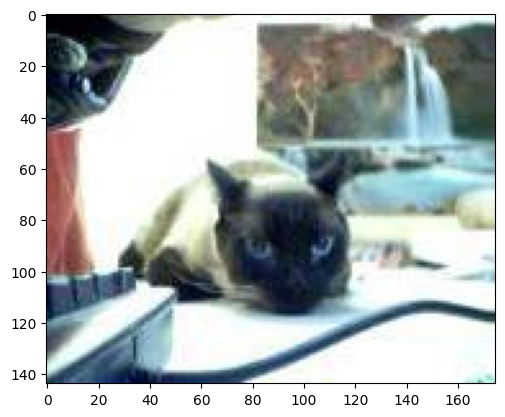

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
# Hiển thị một hình ảnh mẫu từ tập huấn luyện
img = 'training_set/cats/cat.5.jpg'
image = Image.open(img)
plt.imshow(image)
# hiển thị shape của hình ảnh
print({image.size})

In [18]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

In [ ]:
# Tạo ImageDataGenerator với data augmentation cho training set
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Chuẩn hóa pixel về [0,1]
    rotation_range=20,        # Xoay ảnh
    width_shift_range=0.2,    # Dịch chuyển ngang
    height_shift_range=0.2,   # Dịch chuyển dọc
    shear_range=0.2,          # Biến dạng
    zoom_range=0.2,           # Thu phóng
    horizontal_flip=True,     # Lật ngang
    fill_mode='nearest',      # Điền pixel
    validation_split=0.2      # Chia 20% cho validation
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',      # Binary classification (dogs vs cats)
    subset='training'         # Sử dụng 80% cho training
)

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'       # Sử dụng 20% cho validation
)

In [ ]:
# Tạo test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False             # Không shuffle để dễ đánh giá
)

In [ ]:
# In thông tin về dataset
print(f"\nThông tin dataset:")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Class indices: {train_generator.class_indices}")

In [ ]:
def plot_sample_images(generator, title):
    plt.figure(figsize=(12, 8))
    batch_images, batch_labels = next(generator)
    
    for i in range(min(8, len(batch_images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(batch_images[i])
        class_name = 'Dog' if batch_labels[i] == 1 else 'Cat'
        plt.title(f'{class_name}')
        plt.axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Hiển thị ảnh mẫu từ training set
plot_sample_images(train_generator, 'Sample Training Images')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Xây dựng mô hình CNN
def create_cnn_model():
    model = Sequential([
        # Khối tích chập thứ nhất
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(2, 2),
        
        # Khối tích chập thứ hai
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        # Khối tích chập thứ ba
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        # Khối tích chập thứ tư
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        # Flatten để chuyển từ 2D sang 1D
        Flatten(),
        
        # Lớp Fully Connected
        Dense(512, activation='relu'),
        Dropout(0.5),  # Dropout để tránh overfitting
        
        # Lớp đầu ra với Sigmoid cho binary classification
        Dense(1, activation='sigmoid')  # Sigmoid cho binary classification (chó vs mèo)
    ])
    
    return model


In [ ]:
# Tạo mô hình
model = create_cnn_model()

In [ ]:
# Compile mô hình
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',     # Binary crossentropy cho binary classification
    metrics=['accuracy']
)

In [ ]:
# Hiển thị kiến trúc mô hình
print("Kiến trúc mô hình CNN:")
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    # Early stopping để tránh overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    
    # Lưu model tốt nhất
    ModelCheckpoint(
        'best_cnn_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    
    # Giảm learning rate khi loss không cải thiện
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

In [ ]:
EPOCHS = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
# Vẽ biểu đồ training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Biểu đồ Loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Biểu đồ Accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ
plot_training_history(history)

In [ ]:
# Đánh giá mô hình trên test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"\nKết quả trên Test Set:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Dự đoán trên test set
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

In [ ]:
def show_predictions(generator, predictions, num_images=8):
    plt.figure(figsize=(15, 8))
    
    # Reset generator
    generator.reset()
    batch_images, batch_labels = next(generator)
    
    for i in range(min(num_images, len(batch_images))):
        plt.subplot(2, 4, i + 1)
        plt.imshow(batch_images[i])
        
        actual_class = 'Dog' if batch_labels[i] == 1 else 'Cat'
        predicted_class = 'Dog' if predictions[i] > 0.5 else 'Cat'
        confidence = predictions[i][0] if predictions[i] > 0.5 else 1 - predictions[i][0]
        
        color = 'green' if actual_class == predicted_class else 'red'
        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}', 
                 color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Hiển thị kết quả dự đoán
show_predictions(test_generator, predictions, 8)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Lấy nhãn thực tế từ test_generator
y_true = test_generator.classes
# Lấy nhãn dự đoán từ predicted_classes
y_pred = predicted_classes.flatten()
# Lấy tên các lớp từ class_indices
class_names = list(test_generator.class_indices.keys())
# Vẽ confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

In [ ]:
#classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
dog_image = 'dog_sample.jfif'
not_dog_image = 'not_dog_sample.jfif'